In [1]:
import pandas as pd
import numpy as np
import datastats as dt
import structdata as st
import timeseries as ts
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#Read in data set
# train_data = pd.read_csv('Xente/training.csv')
# test_data = pd.read_csv('Xente/test.csv')
# weather_data = pd.read_excel('Xente/WeatherNairobi2016.xls')
# sample_submission = pd.read_csv('Xente/sample_submission_xente.csv')

new_data = pd.read_csv('trainperf.csv')

In [2]:
date_cols = ['approveddate', 'creationdate']

df = ts.get_date_info(new_data, date_features=date_cols, date_cols_to_return=['dow', 'dom'],drop_date_feature=False)

In [3]:
df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,approveddate_dow,approveddate_dom,creationdate_dow,creationdate_dom
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,Tuesday,25,Tuesday,25
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,Wednesday,5,Wednesday,5
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,Thursday,6,Thursday,6
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,Thursday,27,Thursday,27
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,Monday,3,Monday,3


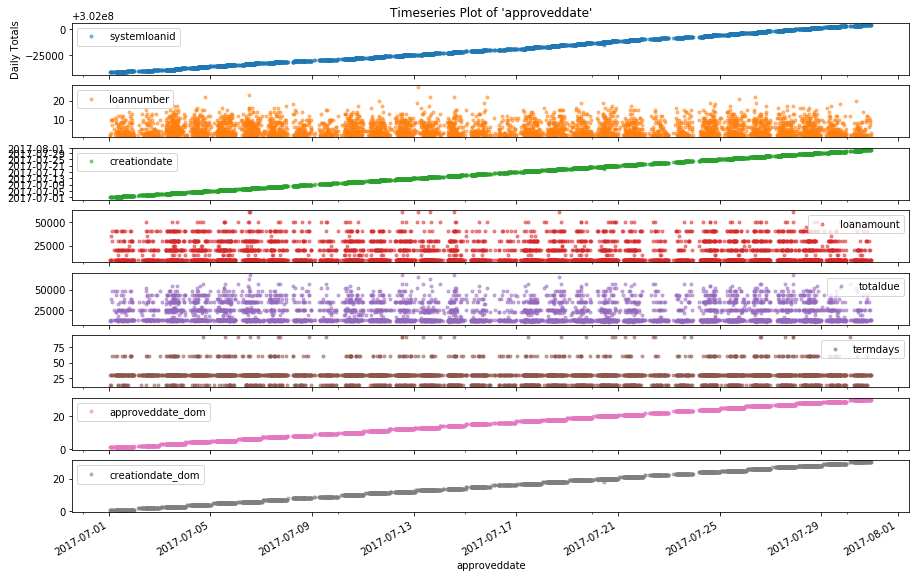

In [3]:
ts.num_to_time(df, time_col='approveddate')

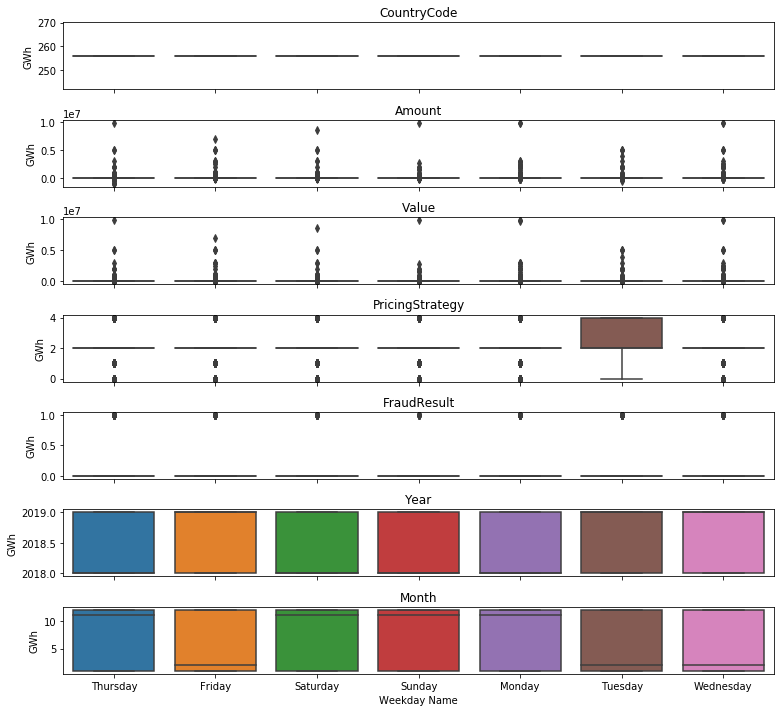

In [28]:
fig, axes = plt.subplots(len(dt.get_num_feats(train_data)), 1, figsize=(11, 10), sharex=True)
for name, ax in zip(dt.get_num_feats(train_data), axes):
    sns.boxplot(data=train_data, x='Weekday Name', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    plt.tight_layout()

    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

In [17]:
dt.get_cat_feats(train_data)

['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'CurrencyCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'Weekday Name']